<a href="https://colab.research.google.com/github/hucarlos08/Geo-ML-AT/blob/main/Predictive_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive models

Most machine learning focuses on predicting outputs $\mathbf y$ from inputs $\mathbf x$ using a function $f$ estimated from labeled training data $D = \{(\mathbf x_n, \mathbf y_n)\}$. This is called a predictive model.  

There are two main types:

- Parametric models have a fixed number of parameters independent of the size of $D$. They are less flexible but faster for prediction.

- Nonparametric models have a variable number of parameters that grows with $D$. They are more flexible but slower.

Parametric models include:

- Generalized linear models (GLMs): $f$ is linear in the parameters $\boldsymbol{\theta}$.

- Neural networks: $f$ is a nonlinear differentiable function of $\boldsymbol{\theta}$.

Models are often fitted by:

- Empirical risk minimization (ERM): minimize average loss on $D$.

- Maximum likelihood estimation (MLE): maximize likelihood of $D$.

- MAP estimation: maximize posterior $p(\boldsymbol{\theta}|D) \propto p(D|\boldsymbol{\theta})p_0(\boldsymbol{\theta})$.

- Variational inference: approximate posterior $q(\boldsymbol{\theta})$ by minimizing KL divergence from prior.

- Generalized Bayes: minimize expected risk regularized by a divergence $D(q||p_0)$.


## Model fitting using ERM, MLE, and MAP:

The most common approach for fitting predictive models is maximum likelihood estimation (MLE). This involves finding the parameters θ that maximize the likelihood of the training data:

\begin{equation}
\hat{\boldsymbol{\theta}} = \underset{\boldsymbol{\theta}\in \Theta}{\operatorname{argmin}} p(D|\boldsymbol{\theta}) = \underset{\boldsymbol{\theta}\in \Theta}{\operatorname{argmin}} \log p(D|\boldsymbol{\theta})
\end{equation}

For $N$ iid data samples, the likelihood decomposes into a product over data points. We can instead minimize the negative log likelihood:

\begin{equation}
\hat{\boldsymbol{\theta}} = \underset{\boldsymbol{\theta} \in \Theta}{\operatorname{argmin}} \frac{1}{N}\sum_{n=1}^{N} [\log p(\mathbf y_{n}|\mathbf x_{n}, \boldsymbol{\theta})]
\end{equation}

We can generalize this by replacing the log loss $\ell_{n}(\boldsymbol{\theta}) = \log p(\mathbf y_{n}|\mathbf x_{n}, \boldsymbol{\theta})$ with a more general loss function $\ell_{n}(\boldsymbol{\theta})$ to get empirical risk minimization (ERM):

\begin{equation}
\hat{\boldsymbol{\theta}} = \underset{\boldsymbol{\theta} \in \Theta}{\operatorname{argmin}}r(\boldsymbol{\theta})
\end{equation}

where $r(\boldsymbol{\theta})$ is the average loss over data points.

To prevent overfitting, we can add a regularizer term $C(\boldsymbol{\theta})$ weighted by $\lambda \geq 0$:

\begin{equation}
\hat{\boldsymbol{\theta}} = \underset{\boldsymbol{\theta} \in \Theta}{\operatorname{argmin}}r(\boldsymbol{\theta}) + \lambda C(\boldsymbol{\theta})  
\end{equation}

Setting $C(\boldsymbol{\theta}) = -\log \pi_{0}(\boldsymbol{\theta})$ recovers MAP estimation, which maximizes the posterior given a prior $\pi_{0}(\boldsymbol{\theta})$:

\begin{equation}
\hat{\boldsymbol{\theta}} = \underset{\boldsymbol{\theta} \in \Theta}{\operatorname{argmax}} \log p(D|\boldsymbol{\theta}) + \log \pi_{0}(\boldsymbol{\theta})
\end{equation}

So in summary, predictive models are often fitted by optimizing objectives based on maximum likelihood, empirical risk, or MAP estimation. Regularization helps prevent overfitting.

### ERM

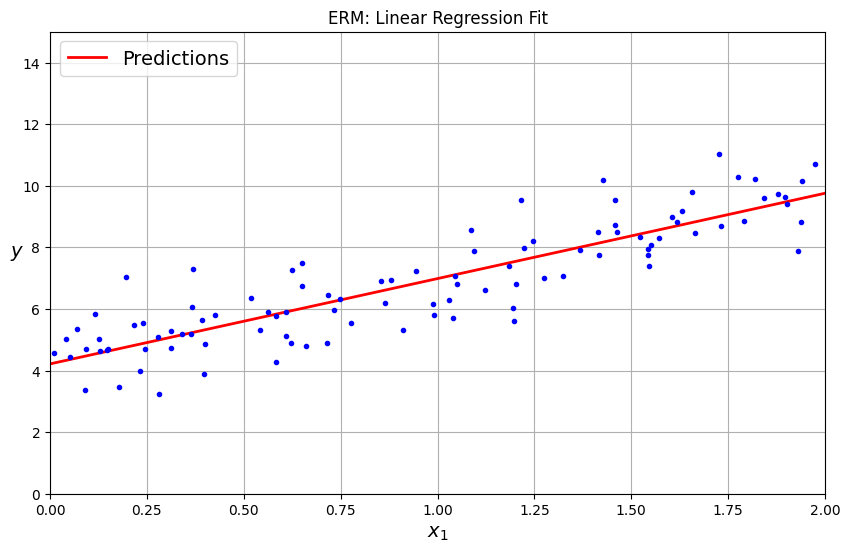

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit a linear regression model using ERM (minimizing squared loss)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Predict using the fitted model
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("ERM: Linear Regression Fit")
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()


### MLE

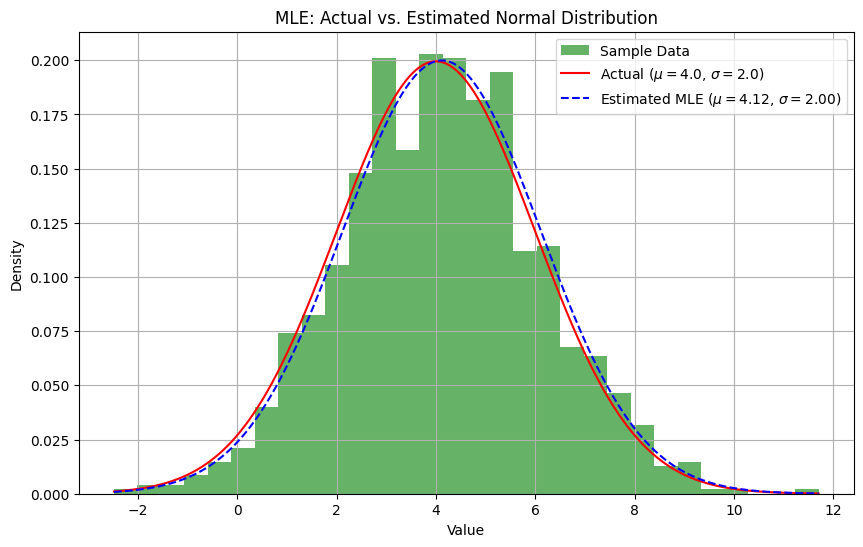

In [2]:
# Generate synthetic data from a normal distribution
mu_actual = 4.0
sigma_actual = 2.0
num_samples = 1000
data = np.random.normal(mu_actual, sigma_actual, num_samples)

# Estimate the parameters using Maximum Likelihood Estimation (MLE)
mu_estimated = np.mean(data)
sigma_estimated = np.std(data, ddof=0)

# Plotting the actual and estimated distributions
x = np.linspace(min(data), max(data), 1000)
y_actual = (1 / (sigma_actual * np.sqrt(2 * np.pi))) * np.exp(- 0.5 * ((x - mu_actual) / sigma_actual) ** 2)
y_estimated = (1 / (sigma_estimated * np.sqrt(2 * np.pi))) * np.exp(- 0.5 * ((x - mu_estimated) / sigma_estimated) ** 2)

plt.figure(figsize=(10,6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label="Sample Data")
plt.plot(x, y_actual, 'r', label=f'Actual ($\mu={mu_actual}$, $\sigma={sigma_actual}$)')
plt.plot(x, y_estimated, 'b--', label=f'Estimated MLE ($\mu={mu_estimated:.2f}$, $\sigma={sigma_estimated:.2f}$)')
plt.title("MLE: Actual vs. Estimated Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


### MLE

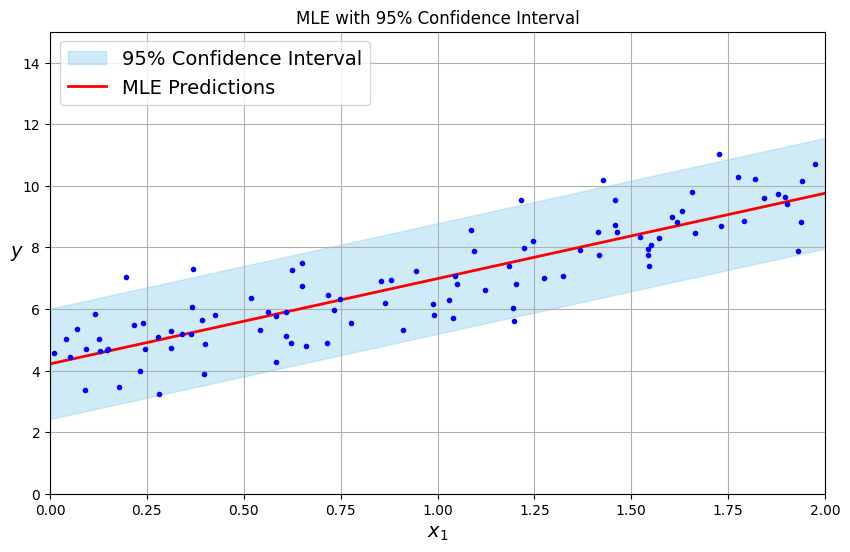

In [4]:
# Calculate the residuals
residuals = y - X_b.dot(theta_best)

# Calculate the MLE estimate for the variance sigma^2
sigma2_mle = (residuals.T.dot(residuals) / len(y))[0, 0]

# Calculate the confidence interval bands
z_value = 1.96  # for 95% confidence interval
sigma_hat = np.sqrt(sigma2_mle)
x_mean = X.mean()

# Calculate the terms for the confidence interval
conf_interval = z_value * sigma_hat * np.sqrt(1 + 1/len(X) + (X_new - x_mean)**2 / np.sum((X - x_mean)**2))

# Upper and lower bounds
upper_bound = y_predict + conf_interval
lower_bound = y_predict - conf_interval

# Plotting
plt.figure(figsize=(10,6))
plt.fill_between(X_new.ravel(), lower_bound.ravel(), upper_bound.ravel(), color='skyblue', alpha=0.4, label='95% Confidence Interval')
plt.plot(X_new, y_predict, "r-", linewidth=2, label="MLE Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("MLE with 95% Confidence Interval")
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()


### MAP

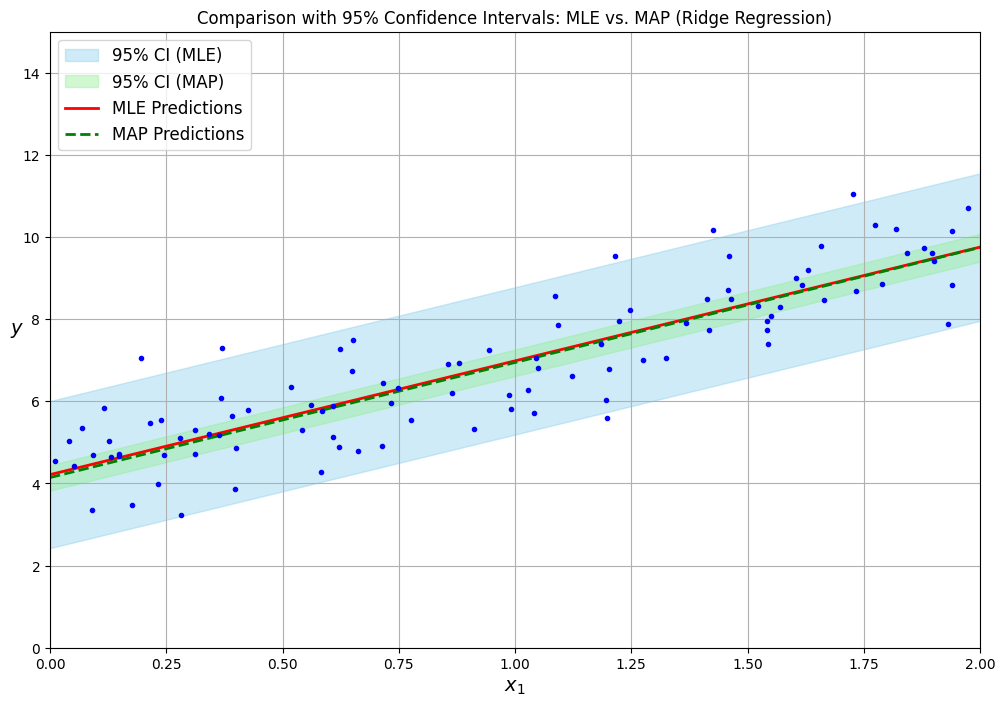

In [5]:
from numpy.linalg import inv

# Regularization parameter (for the sake of illustration, we use a moderate value)
lambda_value = 1

# Compute theta using MAP (Ridge Regression closed-form solution)
theta_map = inv(X_b.T.dot(X_b) + lambda_value * np.eye(X_b.shape[1])).dot(X_b.T).dot(y)

# Predict using the fitted model for MAP
y_predict_map = X_new_b.dot(theta_map)

# Bootstrap method to estimate confidence intervals for MAP (Ridge Regression)
np.random.seed(42)
n_bootstrap_samples = 1000
bootstrap_coefs = np.zeros((n_bootstrap_samples, X_b.shape[1]))

for i in range(n_bootstrap_samples):
    # Sample with replacement from the original data
    indices = np.random.choice(range(len(X)), size=len(X), replace=True)
    X_bootstrap = X_b[indices]
    y_bootstrap = y[indices]

    # Fit Ridge Regression (MAP) to the bootstrap sample
    theta_bootstrap = inv(X_bootstrap.T.dot(X_bootstrap) + lambda_value * np.eye(X_b.shape[1])).dot(X_bootstrap.T).dot(y_bootstrap)
    bootstrap_coefs[i] = theta_bootstrap.ravel()

# Predict using the bootstrap coefficients
bootstrap_preds = X_new_b.dot(bootstrap_coefs.T)

# Compute the percentiles for the confidence interval
lower_bound_map = np.percentile(bootstrap_preds, 2.5, axis=1)
upper_bound_map = np.percentile(bootstrap_preds, 97.5, axis=1)

# Plotting
plt.figure(figsize=(12,8))

# MLE confidence intervals
plt.fill_between(X_new.ravel(), lower_bound.ravel(), upper_bound.ravel(), color='skyblue', alpha=0.4, label='95% CI (MLE)')

# MAP confidence intervals
plt.fill_between(X_new.ravel(), lower_bound_map, upper_bound_map, color='lightgreen', alpha=0.4, label='95% CI (MAP)')

plt.plot(X_new, y_predict, "r-", linewidth=2, label="MLE Predictions")
plt.plot(X_new, y_predict_map, "g--", linewidth=2, label="MAP Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.title("Comparison with 95% Confidence Intervals: MLE vs. MAP (Ridge Regression)")
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()



## Model fitting using Bayes, variational inference (VI), and generalized Bayes:

Instead of a point estimate for $\boldsymbol{\theta}$, we can estimate a distribution $q(\boldsymbol{\theta})$ to account for uncertainty.

The empirical risk minimization (ERM) objective can be extended to:

\begin{equation}
\hat{q} = \underset{q \in P(\Theta)}{\operatorname{argmin}} E_{q(\boldsymbol{\theta})}[r(\boldsymbol{\theta})]  
\end{equation}

where $P(\Theta)$ is the space of distributions over $\boldsymbol{\theta}$.

To prevent $q$ collapsing to a delta function at the maximum likelihood estimate, we can regularize by minimizing the KL divergence from a prior $\pi_0(\boldsymbol{\theta})$:

\begin{equation}
\hat{q} = \underset{q \in P(\Theta)}{\operatorname{argmin}} E_{q(\boldsymbol{\theta})}[r(\boldsymbol{\theta})] + \frac{1}{\lambda} D_{KL}(q || \pi_{0})
\end{equation}

The solution is the Gibbs posterior distribution.

### Gibbs Posterior Distribution in Bayesian Inference

In traditional Bayesian inference, the posterior distribution is derived from Bayes' theorem as:

$$
p(\boldsymbol{\theta} | {D}) = \frac{p({D} | \boldsymbol{\theta}) \pi_0(\boldsymbol{\theta})}{p({D})}
$$

Where:
- $p(\boldsymbol{\theta} | {D})$ represents the posterior distribution.
- $p({D} | \boldsymbol{\theta})$ denotes the likelihood.
- $\pi_0(\boldsymbol{\theta})$ is the prior distribution.
- $p({D})$ signifies the evidence.

In the context of empirical risk minimization, the objective is to identify parameters $\boldsymbol{\theta}$ that minimize an accumulated loss over the data. The empirical risk $r(\boldsymbol{\theta})$ serves as a measure of this cumulative loss.

The Gibbs posterior distribution is an adaptation of the traditional posterior distribution, tailored to incorporate this empirical risk. The essence is to penalize parameter configurations $\boldsymbol{\theta}$ exhibiting high empirical risk. The exponential form $e^{-\lambda r(\boldsymbol{\theta})}$ accomplishes this penalization effectively.

Specifically, the term $e^{-\lambda r(\boldsymbol{\theta})}$ operates as a "modified" likelihood. A high $r(\boldsymbol{\theta})$ (indicating a poor fit to the data) will suppress this term, while a low $r(\boldsymbol{\theta})$ (indicating a good fit) will elevate it.

The scalar $\lambda$ governs the penalization degree. A larger $\lambda$ will more severely penalize configurations of $\boldsymbol{\theta}$ that poorly fit the data.

The final form of the Gibbs posterior distribution is:

$$
\hat{q}(\boldsymbol{\theta}) = \frac{e^{-\lambda r(\boldsymbol{\theta})} \pi_{0}(\boldsymbol{\theta})}{\int e^{-\lambda r(\boldsymbol{\theta}^{'})} \pi_{0}(\boldsymbol{\theta}^{'}) d\boldsymbol{\theta}^{'}}
$$

The denominator serves as a normalization factor, ensuring that $\hat{q}(\boldsymbol{\theta})$ integrates to 1 and thus remains a valid probability distribution.

In essence, the Gibbs posterior distribution offers a means to meld Bayesian inference with empirical risk minimization, allowing for the incorporation of both parameter uncertainty and the desire for a model that aligns well with observed data.


For log loss and $\lambda=N$, this recovers the Bayes posterior:

\begin{equation}
\hat{q}(\boldsymbol{\theta}) = \frac{p(D|\boldsymbol{\theta})\pi_{0}(\boldsymbol{\theta})}{\int p(D|\boldsymbol{\theta}^{'}) \pi_{0}(\boldsymbol{\theta}^{'}) d\boldsymbol{\theta}^{'}}
\end{equation}

Computing the Bayes posterior is often intractable. Variational inference restricts $q$ to some family $Q(\mathbf{\theta})$ to get a tractable approximation.

Generalized Bayes minimizes expected risk regularized by a general divergence $D_{KL}(q||\pi_0)$.

So Bayes, VI and generalized Bayes methods estimate a distribution over parameters rather than a point estimate. This helps prevent overfitting.

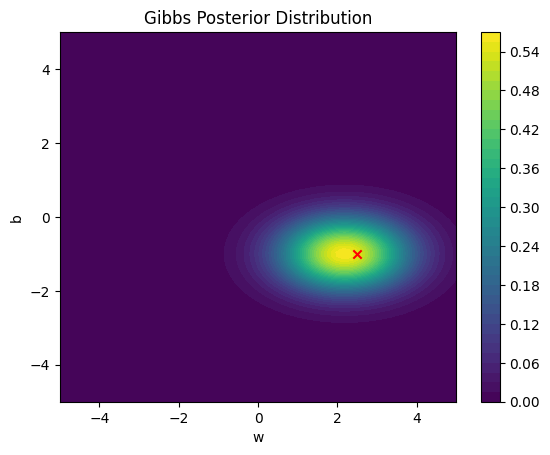

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos simulados
np.random.seed(42)
N = 100
X = np.linspace(-1, 1, N)
true_w = 2.5
true_b = -1
Y = true_w * X + true_b + 0.5 * np.random.randn(N)

# Riesgo empírico (Error cuadrado medio)
def empirical_risk(w, b, X, Y):
    return np.mean((Y - w * X - b)**2)

# Prior Gaussiano
sigma = 3.0
def gaussian_prior(w, b, sigma):
    return np.exp(- (w**2 + b**2) / (2 * sigma**2))

# Distribución posterior de Gibbs (sin normalizar)
lambda_value = 1.0
def gibbs_posterior(w, b, X, Y, lambda_value, sigma):
    return np.exp(-lambda_value * empirical_risk(w, b, X, Y)) * gaussian_prior(w, b, sigma)

# Espacio de parámetros
w_values = np.linspace(-5, 5, 100)
b_values = np.linspace(-5, 5, 100)
W, B = np.meshgrid(w_values, b_values)

# Evaluar la distribución posterior de Gibbs en el espacio de parámetros
Z = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i, j] = gibbs_posterior(W[i, j], B[i, j], X, Y, lambda_value, sigma)

# Visualizar
plt.contourf(W, B, Z, 50, cmap='viridis')
plt.colorbar()
plt.title('Gibbs Posterior Distribution')
plt.xlabel('w')
plt.ylabel('b')
plt.scatter(true_w, true_b, c='red', marker='x')  # Marcar los verdaderos valores de w y b
plt.show()
